# IMPORTS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import os


# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix
# from sklearn.datasets import load_iris
# from sklearn import svm
# from sklearn.neural_network import MLPClassifier
# from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

* * *

# View Raw Datasets

###  1. World Happiness Dataset 
Following is the raw dataset for world happiness index as downloaded from WHR. It contains multiple rows for one country for roughly 5-7 years.

In [2]:
#Read & Display data
world_happiness_df = pd.read_excel('./Datasets/Raw_Datasets/raw_world_happiness.xls',header=0)
display(world_happiness_df.head(15))

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.370100,0.450662,50.799999,0.718114,0.167640,0.881686,0.517637,0.258195
1,Afghanistan,2009,4.401778,7.539972,0.552308,51.200001,0.678896,0.190099,0.850035,0.583926,0.237092
2,Afghanistan,2010,4.758381,7.646709,0.539075,51.599998,0.600127,0.120590,0.706766,0.618265,0.275324
3,Afghanistan,2011,3.831719,7.619532,0.521104,51.919998,0.495901,0.162427,0.731109,0.611387,0.267175
4,Afghanistan,2012,3.782938,7.705479,0.520637,52.240002,0.530935,0.236032,0.775620,0.710385,0.267919
5,Afghanistan,2013,3.572100,7.725029,0.483552,52.560001,0.577955,0.061148,0.823204,0.620585,0.273328
6,Afghanistan,2014,3.130896,7.718354,0.525568,52.880001,0.508514,0.104013,0.871242,0.531691,0.374861
7,Afghanistan,2015,3.982855,7.701992,0.528597,53.200001,0.388928,0.079864,0.880638,0.553553,0.339276
8,Afghanistan,2016,4.220169,7.696560,0.559072,53.000000,0.522566,0.042265,0.793246,0.564953,0.348332
9,Afghanistan,2017,2.661718,7.697381,0.490880,52.799999,0.427011,-0.121303,0.954393,0.496349,0.371326


#### Summarize the dataset & View Null values

In [3]:
#View Info and count null values for each column
display(world_happiness_df.describe())
display(world_happiness_df.info())
display(world_happiness_df.isnull().sum(axis = 0))

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,2013.216008,5.466707,9.368459,0.812553,63.359375,0.742567,0.000108,0.747111,0.709998,0.268552
std,4.166828,1.115717,1.154091,0.118480,7.510244,0.142104,0.162221,0.186793,0.107106,0.085176
min,2005.000000,2.375092,6.635322,0.290184,32.299999,0.257534,-0.335040,0.035198,0.321690,0.082737
25%,2010.000000,4.640079,8.463744,0.749390,58.685000,0.647048,-0.112973,0.690305,0.625373,0.206403
50%,2013.000000,5.386025,9.460323,0.835167,65.199997,0.763476,-0.025393,0.802428,0.722391,0.258117
75%,2017.000000,6.283498,10.352778,0.905291,68.589998,0.856030,0.090967,0.871942,0.799276,0.319716
max,2020.000000,8.018934,11.648169,0.987343,77.099998,0.985178,0.698099,0.983276,0.943621,0.704590


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
Country name                        1949 non-null object
year                                1949 non-null int64
Life Ladder                         1949 non-null float64
Log GDP per capita                  1913 non-null float64
Social support                      1936 non-null float64
Healthy life expectancy at birth    1894 non-null float64
Freedom to make life choices        1917 non-null float64
Generosity                          1860 non-null float64
Perceptions of corruption           1839 non-null float64
Positive affect                     1927 non-null float64
Negative affect                     1933 non-null float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


None

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64

#### Observation: World Happiness Data
We see that a couple columns have null/empty values. Seems like we got some data cleaning do to. A plus point is that all our all our columns (except year) are float types. However, we need to get rid of some columns we don't need

* * *

###  2. Covid Dataset 
Following is the raw dataset for Covid-19 as downloaded from WHO. It contains information about different metrics related to each country's covid situation

In [4]:
#Read & Display data
covid_df = pd.read_csv('./Datasets/Raw_Datasets/raw_covid.csv',header=0)
covid_df.head(15)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
5,Antigua and Barbuda,86,3,65,18,4,0,5,3.49,75.58,4.62,76,10,13.16,Americas
6,Argentina,167416,3059,72575,91782,4890,120,2057,1.83,43.35,4.21,130774,36642,28.02,Americas
7,Armenia,37390,711,26665,10014,73,6,187,1.90,71.32,2.67,34981,2409,6.89,Europe
8,Australia,15303,167,9311,5825,368,6,137,1.09,60.84,1.79,12428,2875,23.13,Western Pacific
9,Austria,20558,713,18246,1599,86,1,37,3.47,88.75,3.91,19743,815,4.13,Europe


#### Summarize & observe null values for each column

In [5]:
display(covid_df.describe())
display(covid_df.info())
display(covid_df.isnull().sum(axis = 0))

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.450000,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.620000,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.440000,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
Country/Region            187 non-null object
Confirmed                 187 non-null int64
Deaths                    187 non-null int64
Recovered                 187 non-null int64
Active                    187 non-null int64
New cases                 187 non-null int64
New deaths                187 non-null int64
New recovered             187 non-null int64
Deaths / 100 Cases        187 non-null float64
Recovered / 100 Cases     187 non-null float64
Deaths / 100 Recovered    187 non-null float64
Confirmed last week       187 non-null int64
1 week change             187 non-null int64
1 week % increase         187 non-null float64
WHO Region                187 non-null object
dtypes: float64(4), int64(9), object(2)
memory usage: 22.0+ KB


None

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

#### Observation: Covid Data
We see that our data doesn't contain any null values. Seems like we still  we got some data cleaning do to in terms of choosing only the columns we need

* * *

###  3. Basic Drinking Water Services Dataset 
Following is the raw dataset for basic water services around the globe. It contains multiple rows for one country for roughly 5-7 years. Each row corresponds to one year of data.

In [6]:
#Read & Display data
drinking_water_services_df = pd.read_csv('./Datasets/Raw_Datasets/raw_drinking_water_services.csv',header=0)
drinking_water_services_df.head(10)

,Location,Period,Indicator,First Tooltip
0,Afghanistan,2017,Population using at least basic drinking-water...,57.32
1,Afghanistan,2016,Population using at least basic drinking-water...,54.84
2,Afghanistan,2015,Population using at least basic drinking-water...,52.39
3,Afghanistan,2014,Population using at least basic drinking-water...,49.96
4,Afghanistan,2013,Population using at least basic drinking-water...,47.56
5,Afghanistan,2012,Population using at least basic drinking-water...,45.19
6,Afghanistan,2011,Population using at least basic drinking-water...,42.84
7,Afghanistan,2010,Population using at least basic drinking-water...,40.52
8,Afghanistan,2009,Population using at least basic drinking-water...,38.23
9,Afghanistan,2008,Population using at least basic drinking-water...,35.97


#### Summarize the dataset

In [7]:
display(drinking_water_services_df.describe())
display(covid_df.info())
drinking_water_services_df.isnull().sum(axis = 0)

,Period,First Tooltip
count,3455.000000,3455.000000
mean,2008.529957,77.847103
std,5.170589,23.987570
min,2000.000000,10.130000
25%,2004.000000,59.895000
50%,2009.000000,87.650000
75%,2013.000000,98.460000
max,2017.000000,100.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
Country/Region            187 non-null object
Confirmed                 187 non-null int64
Deaths                    187 non-null int64
Recovered                 187 non-null int64
Active                    187 non-null int64
New cases                 187 non-null int64
New deaths                187 non-null int64
New recovered             187 non-null int64
Deaths / 100 Cases        187 non-null float64
Recovered / 100 Cases     187 non-null float64
Deaths / 100 Recovered    187 non-null float64
Confirmed last week       187 non-null int64
1 week change             187 non-null int64
1 week % increase         187 non-null float64
WHO Region                187 non-null object
dtypes: float64(4), int64(9), object(2)
memory usage: 22.0+ KB


None

Location         0
Period           0
Indicator        0
First Tooltip    0
dtype: int64

#### Observation: Drinking Water Services Data
We see that our data doesn't contain any null values. Not much data cleaning will be used needed here

* * *

###  4. Crude Suicide Rates Dataset 
Following is the raw dataset for Crude Suicide Rates as downloaded from WHO. It contains information about different metrics related to how suicide rate varies in each country

In [8]:
#Read & Display data
crude_suicide_rates_df = pd.read_csv('./Datasets/Raw_Datasets/raw_crude_suicide_rates.csv',header=0)
crude_suicide_rates_df.head(5)

,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2016,Crude suicide rates (per 100 000 population),Both sexes,0.0
1,Afghanistan,2016,Crude suicide rates (per 100 000 population),Male,0.0
2,Afghanistan,2016,Crude suicide rates (per 100 000 population),Female,0.0
3,Afghanistan,2015,Crude suicide rates (per 100 000 population),Both sexes,4.8
4,Afghanistan,2015,Crude suicide rates (per 100 000 population),Male,7.8


#### Summarize the dataset

In [9]:
display(crude_suicide_rates_df.describe())
display(crude_suicide_rates_df.info())
crude_suicide_rates_df.isnull().sum(axis = 0)

,Period,First Tooltip
count,2745.000000,2745.000000
mean,2009.200000,8.129909
std,6.047588,9.560630
min,2000.000000,0.000000
25%,2005.000000,1.900000
50%,2010.000000,5.700000
75%,2015.000000,11.400000
max,2016.000000,93.500000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2745 entries, 0 to 2744
Data columns (total 5 columns):
Location         2745 non-null object
Period           2745 non-null int64
Indicator        2745 non-null object
Dim1             2745 non-null object
First Tooltip    2745 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 107.3+ KB


None

Location         0
Period           0
Indicator        0
Dim1             0
First Tooltip    0
dtype: int64

#### Observation: Crude Suicide Rates Data
We see that our data doesn't contain any null values. Not much data cleaning will be used needed here except for getting rid of some columns

* * *

###  5. Medical Doctors
Following is the raw dataset for Medical Doctors as downloaded from WHO

In [10]:
#Read & Display data
medical_doctors_df = pd.read_csv('./Datasets/Raw_Datasets/raw_medical_doctors.csv',header=0)
medical_doctors_df.head(15)

,Location,Period,Indicator,First Tooltip
0,Afghanistan,2016,"Medical doctors (per 10,000)",2.78
1,Afghanistan,2015,"Medical doctors (per 10,000)",2.85
2,Afghanistan,2014,"Medical doctors (per 10,000)",2.98
3,Afghanistan,2013,"Medical doctors (per 10,000)",2.85
4,Afghanistan,2012,"Medical doctors (per 10,000)",2.41
5,Afghanistan,2011,"Medical doctors (per 10,000)",2.52
6,Afghanistan,2010,"Medical doctors (per 10,000)",2.37
7,Afghanistan,2009,"Medical doctors (per 10,000)",2.13
8,Afghanistan,2008,"Medical doctors (per 10,000)",1.74
9,Afghanistan,2007,"Medical doctors (per 10,000)",1.74


#### Summarize the dataset

In [11]:
display(medical_doctors_df.describe())
display(medical_doctors_df.info())
medical_doctors_df.isnull().sum(axis = 0)

,Period,First Tooltip
count,2506.000000,2506.000000
mean,2006.184757,20.685012
std,7.483407,14.299267
min,1990.000000,0.130000
25%,2001.000000,7.782500
50%,2007.000000,21.280000
75%,2012.000000,31.660000
max,2018.000000,84.220000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506 entries, 0 to 2505
Data columns (total 4 columns):
Location         2506 non-null object
Period           2506 non-null int64
Indicator        2506 non-null object
First Tooltip    2506 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 78.4+ KB


None

Location         0
Period           0
Indicator        0
First Tooltip    0
dtype: int64

#### Observation: Medical Doctors Data
We see that our data doesn't contain any null values. Not much data cleaning will be used needed here except for getting rid of some columns

* * *

# RUN THE DATA CLEANING SCRIPT
Now that we have taken a look at our 5 datasets that will be used for this project, we need to clean the datasets before we start working on them. We will run `data_cleaning.py` script in this notebook. 

 This Python script will take the raw datasets from `./Datasets/Raw_Datasets` directory, clean them, and store the clean files into `./Datasets/Cleaned_Datasets` directory as new files

In [12]:
# Data cleaning script
%run data_cleaning.py

Running the Python Script to clean data.....

Removing duplicate rows from each dataset....

Cleaned `World Happiness Data` and exported as a new csv file....
Cleaned `Covid Data` and exported as a new csv file....
Cleaned `Clean Drinking Water Data` and exported as a new csv file....
Cleaned `Crude Suicide Rates Data` and exported as a new csv file....
Cleaned `Medical Doctors Data` and exported as a new csv file....


SUCCESS

Data Cleaning Done.
Check `Datasets/Cleaned_Datasets` directory to view new csv files with cleaned data


* * *

# VIEW CLEANED DATASETS
The cleaning is complete at this point. Let's read our cleaned files from `Datasets/Cleaned_Datasets` directory

###  1. World Happiness Dataset ***(Cleaned)***

In [13]:
cleaned_world_happiness_df = pd.read_csv("./Datasets/Cleaned_Datasets/cleaned_world_happiness.csv", header=0)
cleaned_world_happiness_df.head()

,country,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom,generosity,corruption
0,Afghanistan,3.594628,7.650843,0.508245,52.266667,0.518012,0.070041,0.843283
1,Albania,5.019427,9.384397,0.716316,67.546154,0.662830,-0.082628,0.869360
2,Algeria,5.389717,9.328897,0.803582,65.290000,0.519009,-0.144289,0.690871
3,Angola,4.420299,8.989725,0.737973,53.550000,0.455957,-0.088023,0.867018
4,Argentina,6.310166,10.033868,0.904423,67.900000,0.768254,-0.159684,0.841997


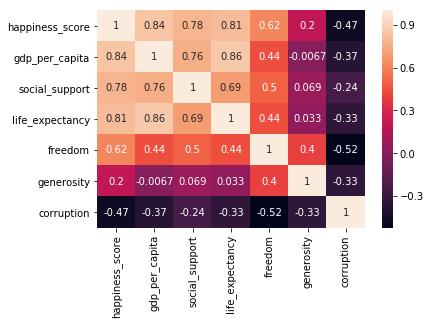

In [14]:
sns.heatmap(cleaned_world_happiness_df.corr(), annot=True)

###  2. Covid Dataset ***(Cleaned)***

In [15]:
cleaned_covid_df = pd.read_csv("./Datasets/Cleaned_Datasets/cleaned_covid.csv", header=0)
cleaned_covid_df.head()

,country,total_confirmed,total_deaths,total_recovered,deaths_per_100,recovered_per_100,region
0,Afghanistan,36263,1269,25198,3.50,69.49,Eastern Mediterranean
1,Albania,4880,144,2745,2.95,56.25,Europe
2,Algeria,27973,1163,18837,4.16,67.34,Africa
3,Andorra,907,52,803,5.73,88.53,Europe
4,Angola,950,41,242,4.32,25.47,Africa


#### Take a look at Covid deaths in each region

In [16]:
sort_by_region = cleaned_covid_df.groupby(['region'], as_index=False).sum()
sort_by_region.head()

,region,total_confirmed,total_deaths,total_recovered,deaths_per_100,recovered_per_100
0,Africa,723207,12223,440645,110.71,2736.71
1,Americas,8839286,342732,4468616,106.84,2180.20
2,Eastern Mediterranean,1490744,38339,1201400,78.39,1465.05
3,Europe,3299523,211144,1993723,235.11,3843.56
4,South-East Asia,1835297,41349,1156933,12.96,667.04


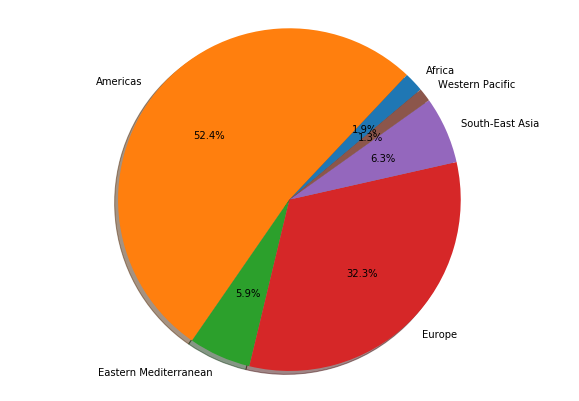

In [17]:
  # Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(sort_by_region['total_deaths'],
        labels=sort_by_region['region'],
       autopct='%1.1f%%',
       shadow=True, startangle=40)
plt.axis('equal')
# show plot
plt.show()

###  3. Clean Drinking Water Dataset ***(Cleaned)***

In [18]:
cleaned_clean_drinking_water_df = pd.read_csv("./Datasets/Cleaned_Datasets/cleaned_drinking_water_services.csv", header=0)
cleaned_clean_drinking_water_df.head()

,country,clean_water_per_100_people
0,Afghanistan,37.755000
1,Albania,84.061667
2,Algeria,86.305000
3,Andorra,100.000000
4,Angola,24.313889


###  4. Crude Suicide Rates Dataset ***(Cleaned)***

In [19]:
cleaned_crude_suicide_rates_df = pd.read_csv("./Datasets/Cleaned_Datasets/cleaned_crude_suicide_rates.csv", header=0)
cleaned_crude_suicide_rates_df.head()

,country,suicide_rate_per_100000_people
0,Afghanistan,4.300000
1,Albania,5.193333
2,Algeria,2.880000
3,Angola,5.200000
4,Antigua and Barbuda,0.866667


###  4. Medical Doctor Dataset ***(Cleaned)***

In [20]:
cleaned_medical_doctors_df = pd.read_csv("./Datasets/Cleaned_Datasets/cleaned_medical_doctors.csv", header=0)
cleaned_medical_doctors_df.head()


,country,doctors_per_10000_people
0,Afghanistan,2.322500
1,Albania,13.092727
2,Algeria,14.450000
3,Andorra,28.840000
4,Angola,1.167500
